In [8]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import numexpr as ne
import ipywidgets as widgets
from matplotlib import animation
from IPython.display import HTML
import pylab
import random

inputs = list()
equation=widgets.Text(value='x**2',placeholder='Requerido',description='Ecuación:',disabled=False)
expected_input=widgets.FloatText(value='0.35',placeholder='Requerido',description='Precision:',disabled=False)
p_input=widgets.FloatText(value='0.01',placeholder='Requerido',description='Precision:',disabled=False)
a_input = widgets.FloatText(value='0',placeholder='Requerido',description='(a):',disabled=False)
b_input = widgets.FloatText(value='1',placeholder='Requerido',description='(b):',disabled=False)

auto_mode_input = widgets.Checkbox(value=True,description='Automatic', disabled=False)
c_input = widgets.FloatText(value='1',placeholder='Requerido',description='(c):',disabled=False)
d_input = widgets.FloatText(value='0',placeholder='Requerido',description='(d):',disabled=False)
n_input = widgets.IntText(value='200',placeholder='Requerido',description='(n):',disabled=False)
animate_input = widgets.Checkbox(value=True,description='Animate', disabled=False)
widgets.VBox([equation, expected_input, p_input, n_input, a_input,b_input, auto_mode_input, c_input, d_input, animate_input])


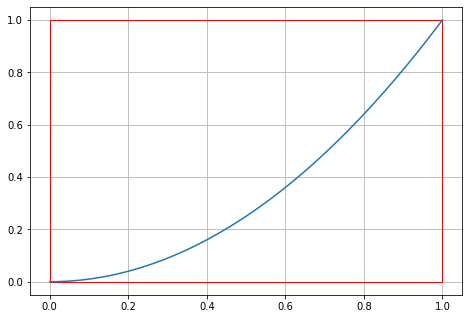

In [11]:
%matplotlib inline
pi = np.pi
e = np.e
x_ini = x = a_input.value
y_ini = ne.evaluate(equation.value).item(0)
x_end = x = b_input.value
y_end = ne.re_evaluate().item(0)

# Equation Limits
auto_mode = auto_mode_input.value
a=x_ini
b=x_end
c=y_end if auto_mode else c_input.value
d=0 if auto_mode else d_input.value
n = n_input.value
p = p_input.value

width  = np.positive(b)-np.positive(a)
height = np.positive(c)-np.positive(d)

def newEquationFigure():
    ## Graph
    fig=plt.figure()
    ax=fig.add_axes([a, d, width, height, ])
    ax.grid(color='silver', linestyle='-', linewidth=1)
    ax.set_axisbelow(True)

    ## Equation Graph
    x=np.arange(x_ini, x_end + p, p)
    y=ne.evaluate(equation.value)
    ax.plot(x,y)

    ## Integration Area
    ax.add_patch(patches.Rectangle(
        (a, d), 
        width, 
        height,
        linewidth=1,edgecolor='r',facecolor='none'))
    return fig, ax

fig, ax = newEquationFigure()

plt.show()



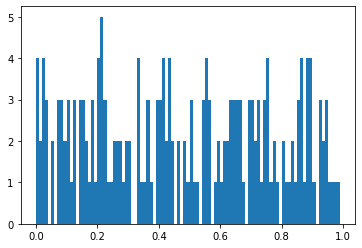

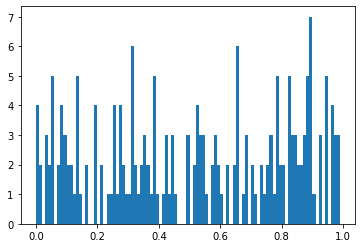

In [12]:
%matplotlib inline
random.seed(113)

x_values = (b - a) * np.random.random_sample(n) + a
pylab.hist(x_values, bins= pylab.arange(a,b,p))
pylab.show()

y_values = (c - d) * np.random.random_sample(n) + d
pylab.hist(y_values, bins= pylab.arange(d,c,p))
pylab.show()

In [13]:
x = x_values
y = y_values
result = ne.evaluate(equation.value + ' >= y')

punto_in = 0
punto_out = 0
area = 0
area_n = []
for i in range(n):
    if result.item(i):
        punto_in += 1
    else:
        punto_out += 1
    area = 0 if i == 0 else (punto_in / i) * ((b - a) * c)
    area_n.append(area)
"Area: {}".format(np.around(area, 4))

'Area: 0.3166'

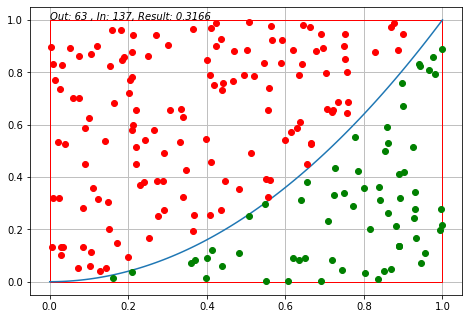

In [14]:
fig, ax = newEquationFigure()
text = ax.text(a, c, 'Out: 0 , In: 0, Result: 0', style='italic')

def montecarlo(i):
    global result_in
    global result_out
    global result_accum
    if i == 0:
        result_in = 0
        result_out = 0
        result_accum = 0
    x = x_values.item(i)
    y = y_values.item(i)
    redDot, = ax.plot(x, y, 'go' if result.item(i) else 'ro')
    if result.item(i):
        result_in += 1
    else:
        result_out += 1
    result_accum = 0 if i == 0 else (result_in / i) * ((b - a) * c)
    text.set_text('Out: {} , In: {}, Result: {}'.format(result_in,result_out , np.around(result_accum, 4)))
    return redDot,

if animate_input.value:
    anim = animation.FuncAnimation(fig, montecarlo,frames=n, interval=1, blit=True, repeat=True)
    HTML(anim.to_jshtml())
else:
    anim=None
    for i in range(n):
        montecarlo(i)
    plt.show()

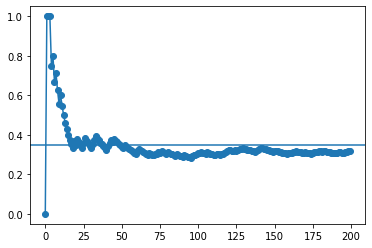

In [16]:
plt.axhline(y=expected_input.value)
plt.plot(range(n), area_n, '-o')
plt.show()

In [15]:
HTML(anim.to_jshtml())